#Define the question
Depending on the patients symptoms,do they have hypothyroidism 

#Metric of Success
Based on all the neccesary variables,create an accurate model that shall predict whether a patient suffers from Hypothyroid or not

#Context
Hypothyroid occurs when the thyroid gland does not produce enough thyroid hormones to meet the demands of the body.Thyroid hormones regulate metabolism, or the way the body uses energy. If thyroxine levels are low, many of the body's functions slow down.

Nairobi hospital is conducting a clinical camp to test if the patients suffers from the disease.
We shall use their data to create the model 

#Experimental design
I shall undertake business Understanding before getting into the dataset where i shall do data understanding followed by data preparation.
After that is done i will do the modelling  and evaluation

#Import the Libraries

In [0]:
#import libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
#import the dataset
df = pd.read_csv("hypothyroid.csv")
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
df.shape

(3163, 26)

In [0]:
#
df.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

In [0]:
df.TSH_measured.unique()

array(['y', 'n'], dtype=object)

In [0]:
#Convert numerical columns to integers
#This is because boxplots do not work with strings
columns = ['age','TSH','T3','TT4','T4U','FTI']
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce',axis=1)
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

#Data Cleaning 

##1.Validity

In [0]:
  #create a function that can pass any dataframe
def plot_boxplots(target_dataframe,col_names):
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    plt.show()

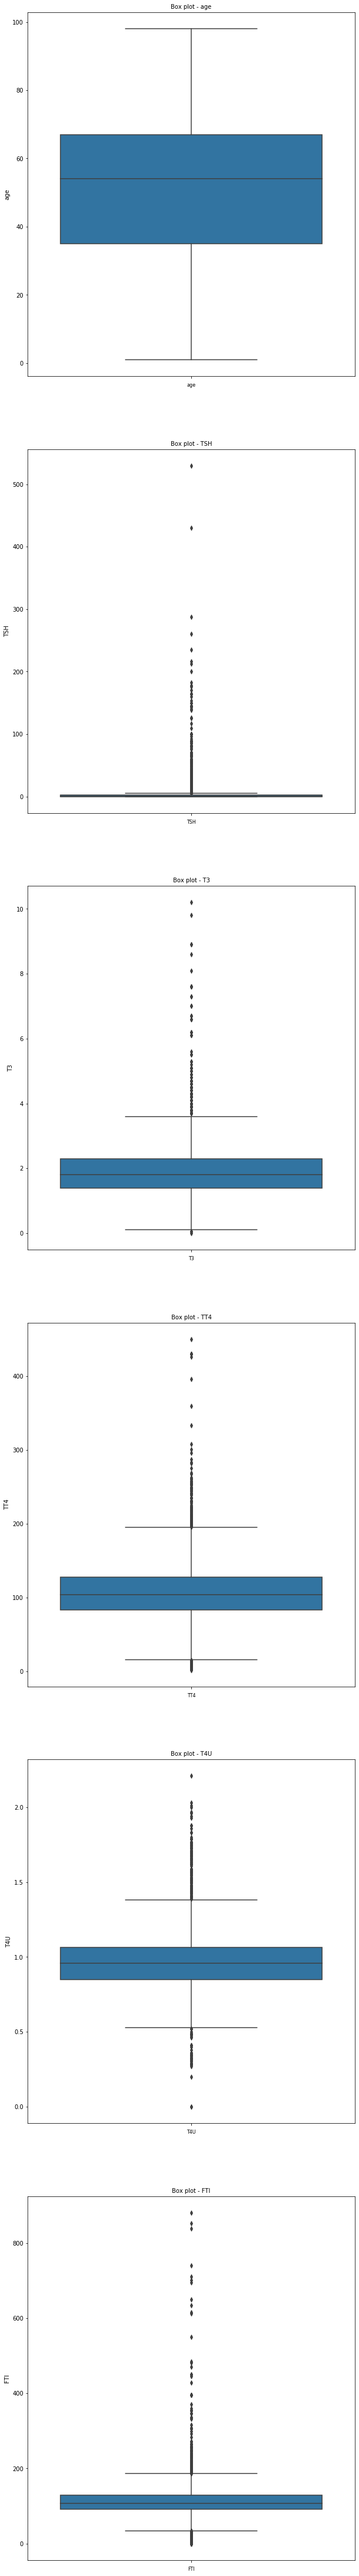

In [0]:
#Execute the function
col_names = ['age','TSH','T3','TT4','T4U','FTI']
target_dataframe = df
plot_boxplots(target_dataframe,col_names)

##2.Completeness

In [0]:
#Replace the ? to get the missing values 
df = df.replace("?", np.nan)

In [0]:
#check for the missing values 
df.isnull().sum()
#No values are missing at this point 
#However,we have ? in the dataset

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
#Dropping the column TBG
df = df.drop(["TBG","TBG_measured"],axis=1)
#Check if it has really been dropped
df.columns 

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

##3.Consistency

In [0]:
df.duplicated().sum()

152

In [0]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#Label Encoding

In [0]:
#For the columns with true and false,we shall convert that to numerical
df['on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
df['query_on_thyroxine'].replace(['t', 'f'],[1,0],inplace=True)
df['on_antithyroid_medication'].replace(['t', 'f'],[1,0],inplace=True)
df['thyroid_surgery'].replace(['t', 'f'],[1,0],inplace=True)
df['query_hypothyroid'].replace(['t', 'f'],[1,0],inplace=True)
df['query_hyperthyroid'].replace(['t', 'f'],[1,0],inplace=True)
df['pregnant'].replace(['t', 'f'],[1,0],inplace=True)
df['sick'].replace(['t', 'f'],[1,0],inplace=True)
df['tumor'].replace(['t', 'f'],[1,0],inplace=True)
df['lithium'].replace(['t', 'f'],[1,0],inplace=True)
df['goitre'].replace(['t', 'f'],[1,0],inplace=True)
df['status'].replace(['hypothyroid', 'negative'],[1,0],inplace=True)
df['sex'].replace(['M', 'F'],[1,0],inplace=True)
df.sample(9)
#This will be important when i  come to do the label encoding 

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
2247,0,39.0,0.0,1,0,0,0,0,0,0,0,0,0,0,y,5.0,y,3.1,y,141.0,y,1.34,y,105.0
115,1,NaN,1.0,0,0,0,0,0,0,0,0,0,0,0,y,176.0,y,0.5,y,6.0,y,1.45,y,4.0
3107,0,45.0,0.0,0,0,0,0,0,0,0,0,0,0,1,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN
859,0,78.0,0.0,0,0,0,0,0,0,0,0,0,0,0,y,2.9,y,1.7,y,103.0,y,0.88,y,117.0
2637,0,55.0,0.0,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,1.5,y,110.0,y,0.77,y,144.0
623,0,73.0,0.0,0,0,0,0,0,0,0,0,0,0,0,y,2.0,y,1.6,y,162.0,y,0.94,y,173.0
2478,0,36.0,0.0,0,0,0,0,0,0,0,0,0,0,0,y,0.9,y,2.0,y,87.0,y,0.88,y,99.0
2621,0,54.0,0.0,0,0,0,0,0,0,0,0,0,0,0,y,5.1,y,1.5,y,66.0,y,0.72,y,92.0
2786,0,NaN,0.0,0,0,0,1,0,0,0,0,0,0,0,y,0.0,y,1.9,y,151.0,y,1.03,y,147.0


In [0]:
df.dtypes

status                         int64
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
dtype: object

#Exploratory Data Analysis

##Univariate Analysis

###Measures of Central Tendency

In [0]:
#Insights on the dataset
df.describe()
#The age bracket is between 1 - 98

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
count,3011.000000,2584.000000,2938.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,2631.000000,2406.000000,2846.000000,2847.000000,2848.000000
mean,0.046828,51.361068,0.302587,0.148124,0.018266,0.013949,0.034208,0.078047,0.075390,0.020259,0.032215,0.013285,0.000664,0.031883,5.809320,1.933666,108.706922,0.977559,115.489080
std,0.211306,19.288226,0.459456,0.355281,0.133935,0.117298,0.181793,0.268290,0.264064,0.140909,0.176601,0.114510,0.025768,0.175718,24.023192,0.979488,44.606704,0.225796,60.147649
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,0.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,0.000000,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,2.300000,127.000000,1.060000,129.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,10.200000,450.000000,2.210000,881.000000


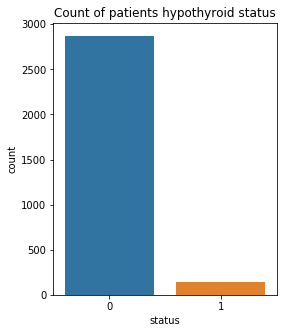

In [0]:
#Check how many people are suffering from hypothyroid
plt.figure(figsize=(4, 5))
sns.countplot(df.status, order = df.status.value_counts().index)
plt.title("Count of patients hypothyroid status")
plt.show()
#we can see that most people from the dataset do not suffer from hypothyroid 

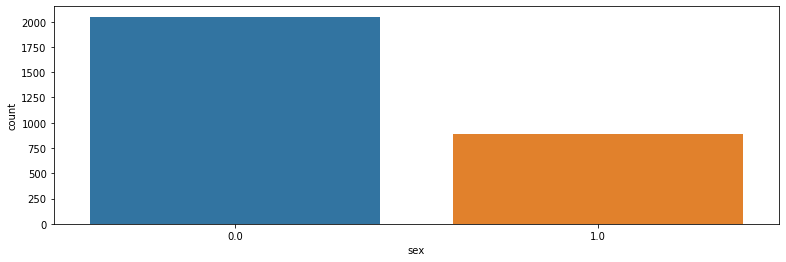

In [0]:
#People who came for the clinic were they male or female.What is the ratio
plt.figure(figsize=(13, 4))
sns.countplot(df.sex, order = df.sex.value_counts().index)
#Our dataset has more females tested than males 

##Bivariate Analysis

In [0]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',300)
df.groupby(['sex','status']).count().sort_values(by = ['status','sex'], ascending =False)

#From the data we can see most people with hypothyroid are women
#They are 94 

,,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
sex,status,,,,,,,,,,,,,,,,,,,,,,
1.0,1,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
0.0,1,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
1.0,0,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717,717
0.0,0,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494,1494


In [0]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',50)
df.groupby(["age"]).count().sort_values(by = ['status'], ascending =False)

#Most people at the age of 59 are high likely to suffer from hypothyroid

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
age,,,,,,,,,,,,,,,,,,,,,,,
59.0,61,61,61,61,61,61,61,61,61,61,61,61,61,61,50,61,48,61,57,61,57,61,57
62.0,61,61,61,61,61,61,61,61,61,61,61,61,61,61,56,61,49,61,58,61,58,61,58
60.0,59,59,59,59,59,59,59,59,59,59,59,59,59,59,53,59,49,59,55,59,55,59,55
72.0,58,58,58,58,58,58,58,58,58,58,58,58,58,58,56,58,51,58,57,58,57,58,57
58.0,57,57,57,57,57,57,57,57,57,57,57,57,57,57,52,57,45,57,54,57,54,57,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
90.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


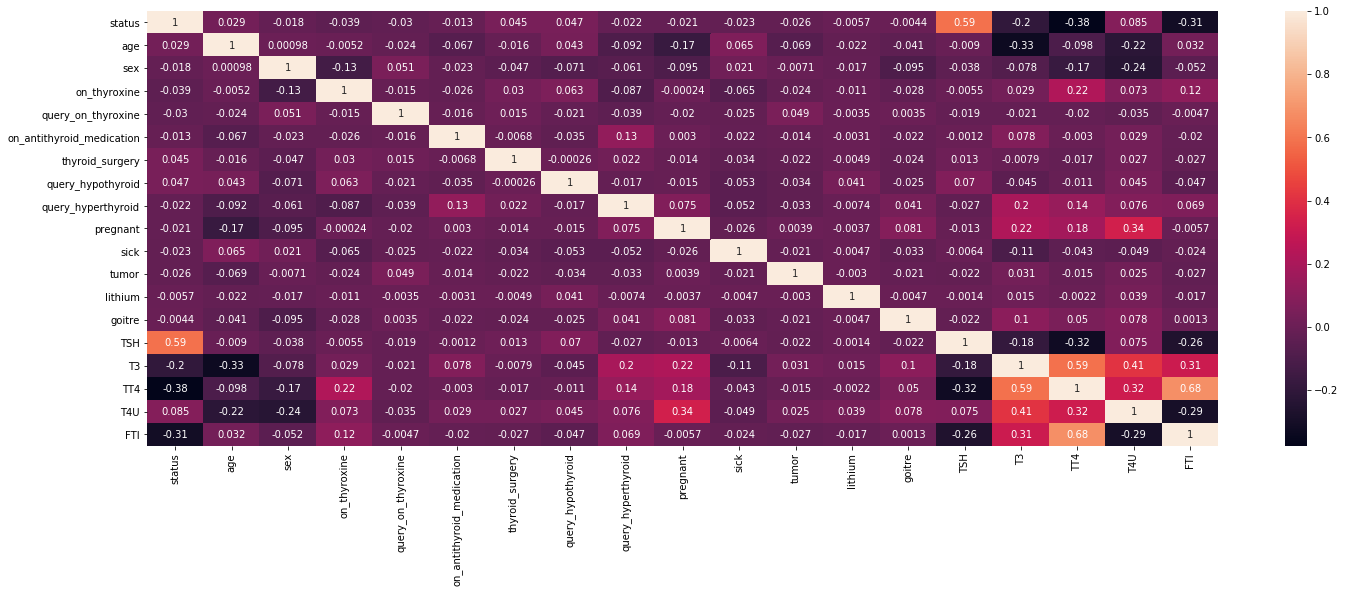

In [0]:
#Check the correlation of our variables 
plt.figure(figsize=(24, 8))
vg_corr = df.corr()
sns.heatmap(vg_corr,xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);


We have a strong correlation between TT4 and T3
However,i shall not drop any of them 

#Regression

##Logistic Regression

Since the response variable is binary,we could go ahead and do the Logistic Regresssion

Howvever,we need to deal with the missing values for the independent variables 

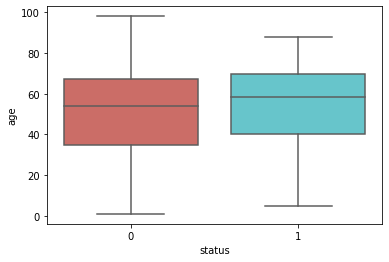

In [0]:
sns.boxplot(x='status', y='age', data=df, palette='hls')

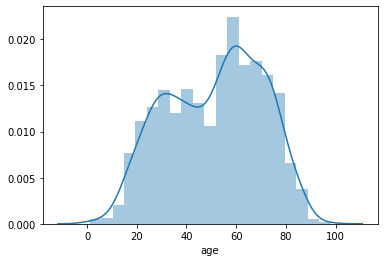

In [0]:
#Create the histogram to determine what age bracket if mainly in the dataset
#We drop nan since histogram does not work when w have missing values 
sns.distplot(df["age"].dropna())

In [0]:
#replace the nans in age with 50 for females and 55 for males
df['age'] = df['age'].fillna(67)
df.isnull().sum()

status                         0
age                            0
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          380
T3_measured                    0
T3                           605
TT4_measured                   0
TT4                          165
T4U_measured                   0
T4U                          164
FTI_measured                   0
FTI                          163
dtype: int64

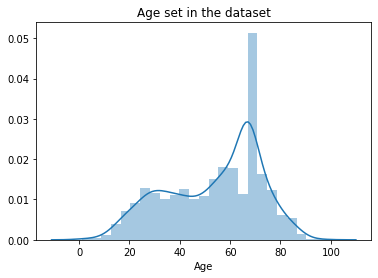

In [0]:
sns.distplot(df["age"])
plt.title("Age set in the dataset")
plt.xlabel("Age")
plt.show()


In [0]:
#The column sex has a number of missing values as well 
df['sex'] = df['sex'].bfill()

In [0]:
df.isnull().sum()
#We have filled the columns we shall be using for modelling
#we can go ahead and create the model

status                         0
age                            0
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          380
T3_measured                    0
T3                           605
TT4_measured                   0
TT4                          165
T4U_measured                   0
T4U                          164
FTI_measured                   0
FTI                          163
dtype: int64

In [0]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [0]:
# Splitting our dataset
#x will be the response variable 
#y is the predictor variable 

X = df.drop(["status",'TSH_measured','TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],axis=1)
y = df["status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Fitting our model
#
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Use the model to make predictions
y_pred = LogReg.predict(X_test)

In [0]:
#Lets look at our predictions
comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison_frame.sample(10)

,Actual,Predicted
1104,0,0
1605,0,0
1580,0,0
1411,0,0
557,0,0
1730,0,0
1439,0,0
51,1,0
2816,0,0
2223,0,0


In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
#We have 858 correct predictions and 46 wrong prediction

array([[858,   0],
       [ 46,   0]])

In [0]:
accuracy_score(y_test,y_pred)

0.9491150442477876

In [0]:
from sklearn.metrics import classification_report
cr = classification_report()
cr(y,y_pred)

##Random Forest

In [0]:
#We will take care of the nan values we have in the remaining columns
df1 = df.dropna(inplace=True)
#df1.isnull().sum()

In [0]:
#First lets encode the rest of the columns that are categorical

df1 = pd.get_dummies(df, columns=['TSH_measured', 'T3_measured','TT4_measured',
       'T4U_measured','FTI_measured'])
df1.head()

#All the column are now numerical

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y
0,1,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,1,1,1,1,1
1,1,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,1,1,1,1,1
2,1,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,1,1,1,1,1
3,1,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,1,1,1,1,1
4,1,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,1,1,1,1,1


In [0]:
df1.dtypes

status                         int64
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TSH_measured_y                 uint8
T3_measured_y                  uint8
TT4_measured_y                 uint8
T4U_measured_y                 uint8
FTI_measured_y                 uint8
dtype: object

In [0]:
#Convert status from object
df1["status"] = df1["status"].apply(pd.to_numeric, errors='coerce')
df1.dtypes

status                         int64
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
TSH_measured_y                 uint8
T3_measured_y                  uint8
TT4_measured_y                 uint8
T4U_measured_y                 uint8
FTI_measured_y                 uint8
dtype: object

In [0]:
# getting our feature names
features = df1.columns.to_list()
features.remove('status')

#Split the dataset
X = df1[features].values

y = df1['status'].values
#Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Import the model
forest = RandomForestRegressor(n_estimators = 100, random_state=21, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [0]:
#Make a prediction nased on the test
y_pred = forest.predict(X_test)

In [0]:
#Lets look at our predictions
comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison_frame.sample(10)

,Actual,Predicted
431,0,0.000023
136,0,0.000023
163,0,0.000023
453,0,0.000023
452,0,0.000023
182,0,0.000023
261,0,0.000023
292,0,0.000023
119,0,0.000023
26,0,0.000023


In [0]:
#Check how good the model is
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.018024092261899365
Mean Squared Error: 0.008525194038149173
Root Mean Squared Error: 0.09233197733260765


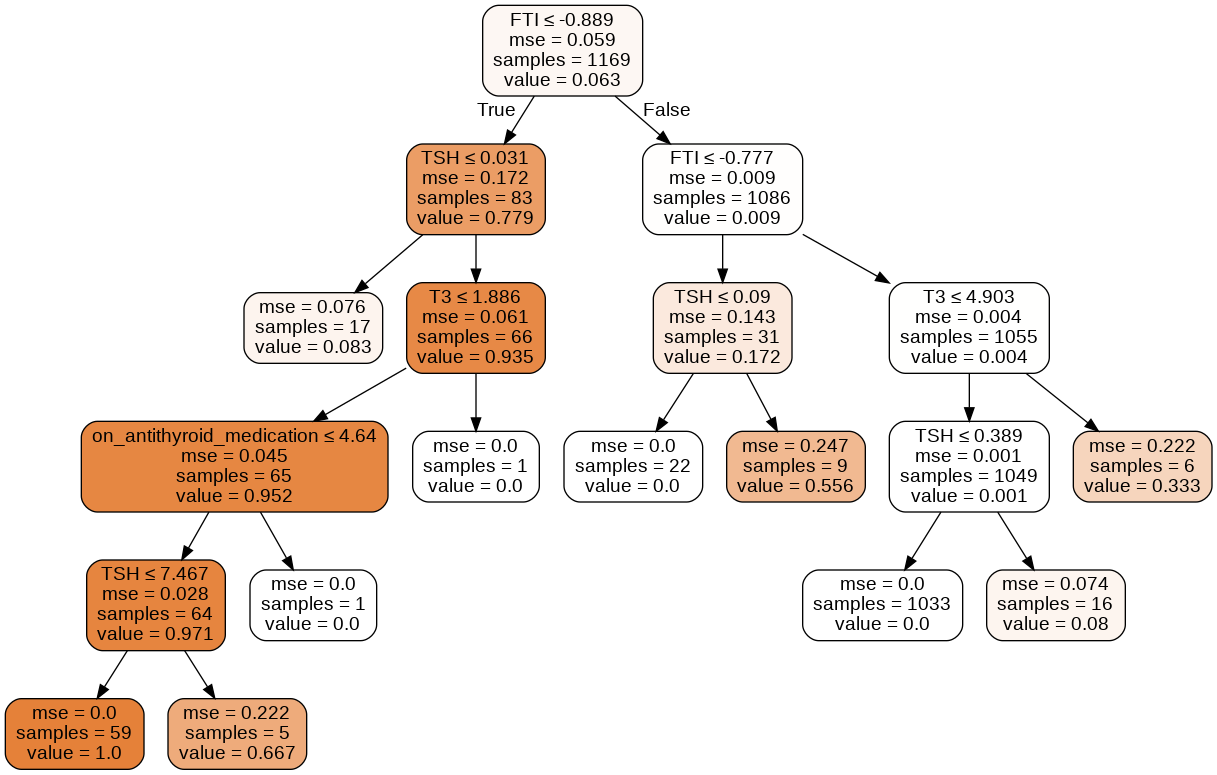

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[23]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [0]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.2), ('T3', 0.03), ('TT4', 0.0), ('T4U', 0.0), ('FTI', 0.75), ('TSH_measured_y', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_y', 0.0)]

Variable: FTI                  Importance: 0.75
Variable: TSH                  Importance: 0.2
Variable: T3                   Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.02
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importanc

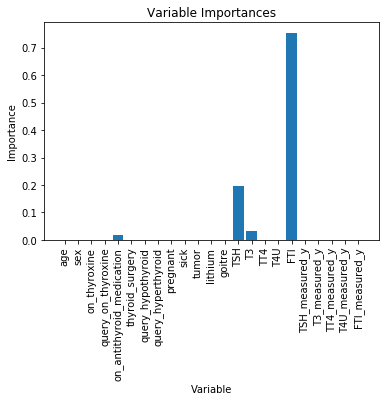

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#Adaboost 

In [0]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth = 5)

# training our model on our training data
decision_tree = decision_tree.fit(X_train, y_train)

# making predictions on the test data
decision_y_pred = decision_tree.predict(X_test)

# comparing actual values to predicted values
decision_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : decision_y_pred.flatten()})

# previewing our summary statistics
decision_compare.describe()

,Actual,Predicted
count,468.000000,468.000000
mean,0.053419,0.050493
std,0.225108,0.208325
min,0.000000,0.000000
25%,0.000000,0.000593
50%,0.000000,0.000593
75%,0.000000,0.000593
max,1.000000,1.000000


In [0]:
from sklearn.ensemble import AdaBoostRegressor

# creating our classifier with 200 trees of depth 1
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), 
                            n_estimators = 200)

# fitting our model to our training data
ada_reg.fit(X_train, y_train)

# making predictions
ada_reg_y_pred = ada_reg.predict(X_test)

# comparing actual values to predicted values
ada_reg_compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : ada_reg_y_pred.flatten()})

# previewing our summary statistics
ada_reg_compare.describe()

,Actual,Predicted
count,468.000000,468.000000
mean,0.053419,0.063862
std,0.225108,0.160418
min,0.000000,0.013027
25%,0.000000,0.013027
50%,0.000000,0.013027
75%,0.000000,0.013027
max,1.000000,0.710744


In [0]:
#evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_reg_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_reg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_reg_y_pred)))

Mean Absolute Error: 0.052820563647457755
Mean Squared Error: 0.01871592242983024
Root Mean Squared Error: 0.13680614909363628


#Gradient boosting 

In [0]:
# getting our feature names
features = df1.columns.to_list()
features.remove('status')

#Split the dataset
X = df1[features].values

y = df1['status'].values
#Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

#Predict using the model
y_pred_gbr = gbr.predict(X_test)


In [0]:
# comparing actual values to predicted values
comparison = pd.DataFrame({'Actual' : y_test,
                        'Predicted' : y_pred_gbr})
comparison.sample(10)

,Actual,Predicted
115,0,0.000803
310,0,0.004182
430,0,-0.000504
262,0,-0.001528
381,0,0.000122
346,0,0.000122
395,0,-0.000077
257,1,0.972962
174,0,-0.000330
431,0,-0.001118


In [0]:
# checking on the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.02152021061909636
Mean Squared Error: 0.008890987945213527
Root Mean Squared Error: 0.09429203542830925


#SVM

##Linear Kernel

In [0]:
# getting our feature names
features = df1.columns.to_list()
features.remove('status')

#Split the dataset
X = df1[features].values

y = df1['status'].values
#Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Build the svm model 
model = SVC(kernel = 'linear')
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)


In [0]:
#Check for the peformance
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

#We have a score of 97% which is good

#Implement the confusion matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#confusion_matrix

0.9786324786324786

##Polynomial Kernel 

In [0]:
# getting our feature names
features = df1.columns.to_list()
features.remove('status')

#Split the dataset
X = df1[features].values

y = df1['status'].values
#Train and test the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Polynomial kernel
polynomial = SVC(kernel = 'poly', gamma = 'auto')


In [0]:
# train the model
polynomial.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Make predicts based on the model you have created
polynomial_y_pred = polynomial.predict(X_test)

In [0]:
#Check on the accuracy
accuracy = accuracy_score(y_test,polynomial_y_pred)
accuracy

0.9743589743589743

The performance for the linear kernel and the polynomial are the same 
Both models could be used to make predictions 

#Challenges
It took a while to understand the data hence it was time consuming 
Several steps were skipped due to the limited time and trying several mathods that could make a good model
